Final Results - Channel Selection


Data Split By Plantations

In [1]:
import feather
import numpy as np
import matplotlib.pyplot as plt
from pandas import *
import matplotlib.image as mpimg



In [2]:
subfolderslist = ['train23_test1','train13_test2','train12_test3']

Test Plantation: 1

In [3]:
test_plantataion = 1
folder = 'analyze\\plantations\\'+subfolderslist[test_plantataion-1]+'\\'
graph_folder = 'graphs_plantations\\'+subfolderslist[test_plantataion-1]+'\\'
model_types = ['random_forest','xgboost','svm']
methods = ('drop_one','drop_more','add_one','random_select')
test_scores = np.zeros((len(model_types),len(methods)))
ub_scores = np.zeros((len(model_types),len(methods)))
num_channels = np.zeros((len(model_types),len(methods)))
row = 0
for model_type in model_types:
    col = 0
    for method in methods:
        filename = model_type+'_'+method+'_method_5top_models_Analysis.feather'
        load = feather.read_dataframe(folder+filename)
        ind = np.argmin(load.test_score)
        test_scores[row][col] = np.round(load.test_score[ind],2)
        ub_scores[row][col] = np.round(load.upper_bound[ind],2)
        num_channels[row][col] = load.num_channels[ind]
        # print(col,row)
        col+=1
        
    # print(row)
    row+=1



In [4]:
def plot_table(data,title,colors=True,buffer = 0.5):
    fig_border = 'steelblue'
    fig_background_color = 'skyblue'

    
    fig = plt.figure(figsize=(5,3),edgecolor=fig_border,facecolor=fig_background_color,tight_layout={'pad':1})
    fig, ax = plt.subplots()
    if colors:
        norm = plt.Normalize(data.min()-buffer, data.max())
        colours = plt.cm.hot(norm(data))
        the_table = ax.table(cellText=data,cellColours=colours,
                        colLabels=methods,rowLabels=model_types,loc='center',
                        cellLoc='center'
                        )
    else:
        the_table = ax.table(cellText=data,
                        colLabels=methods,rowLabels=model_types,loc='center',
                        cellLoc='center'
                        )

    
    ax.axis('tight')
    ax.axis('off')
    plt.suptitle(title)

    # ax.set_title(title)
    
    the_table.scale(1, 5)

    the_table.auto_set_font_size(False)
    the_table.set_fontsize(15)

    cells = the_table._cells
    for cell in the_table._cells:
        if cell[0] == 0:
            the_table._cells[cell].set_fontsize(12)



    plt.draw()
    plt.savefig(graph_folder+title+'.png')


    

<Figure size 500x300 with 0 Axes>

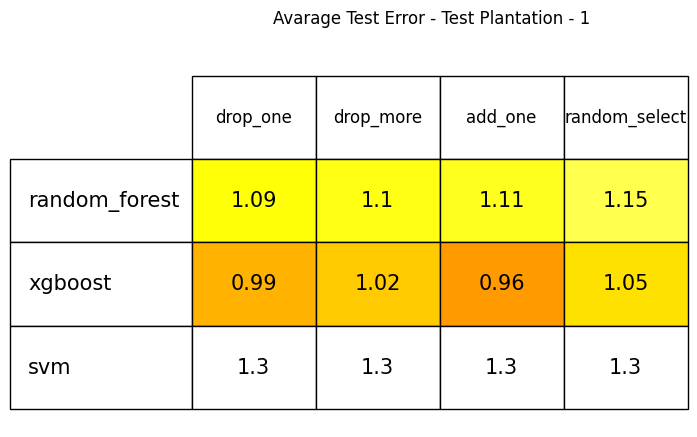

In [5]:
plot_table(test_scores,'Avarage Test Error - Test Plantation - '+str(test_plantataion))


<Figure size 500x300 with 0 Axes>

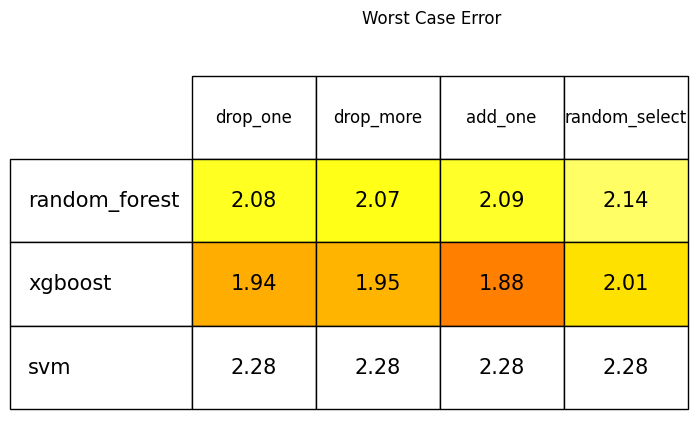

In [6]:
plot_table(ub_scores,'Worst Case Error')


<Figure size 500x300 with 0 Axes>

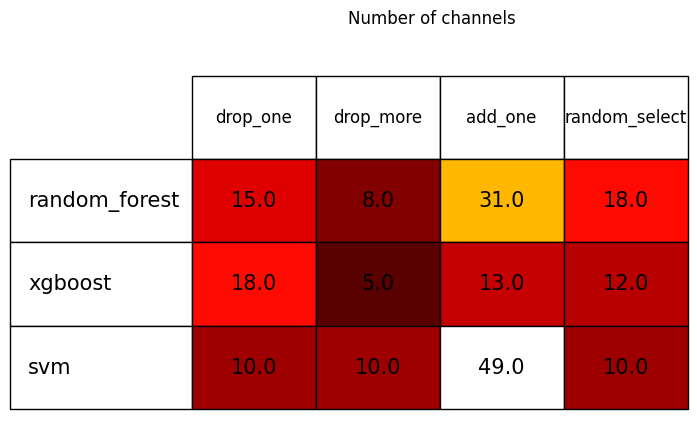

In [7]:
plot_table(num_channels,'Number of channels',buffer=6)

In [8]:
def plot_best(type='train_test',n_models =  5):
    for i in range(len(model_types)):
        model_type = model_types[i]
        method = methods[np.argmin(ub_scores[i])]        

        if type=='train_test':
            train_test_path = graph_folder+'best_channel_number//'+model_type+'_'+method+'_methodch_num_train_test.png'
            train_test_img = mpimg.imread(train_test_path)
            plt.figure()
            plt.imshow(train_test_img)

        if type=='test':
            test_path = graph_folder+'best_channel_number//'+model_type+'_'+method+'_methodch_num_test.png'
            test_img = mpimg.imread(test_path)
            plt.figure() 
            plt.imshow(test_img)

        if type=='wl':
            best_models_path = graph_folder+'total_best_wl//'+model_type+'_'+method+'_methodtot_best_wl'+str(n_models)+'models.png'
            best_models_img = mpimg.imread(best_models_path)
            plt.figure()
            plt.imshow(best_models_img)


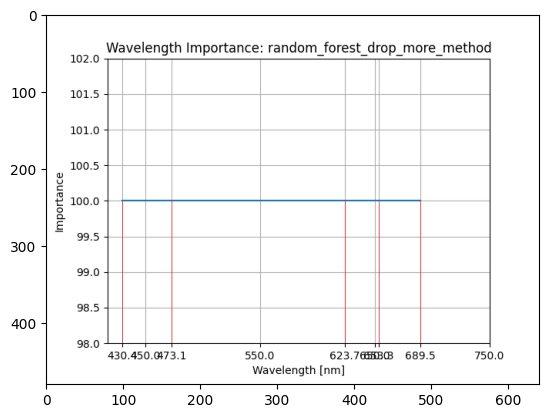

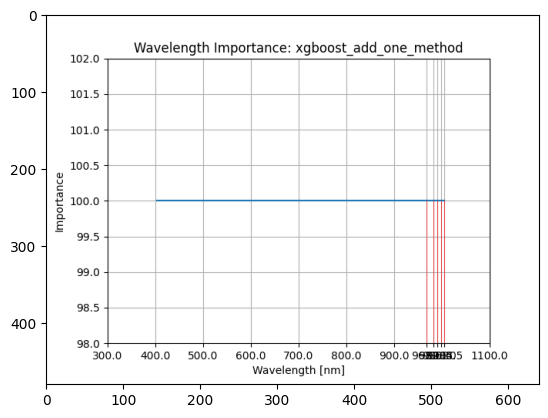

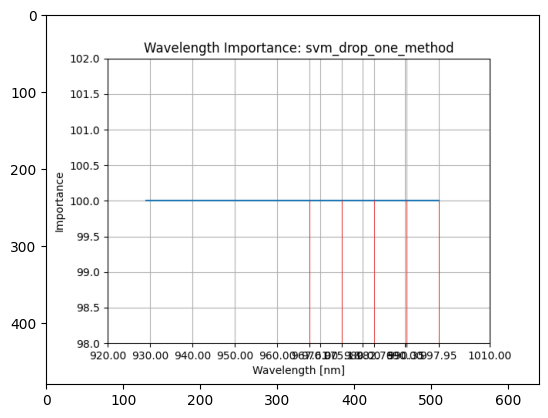

In [9]:
plot_best(type='wl',n_models=1)

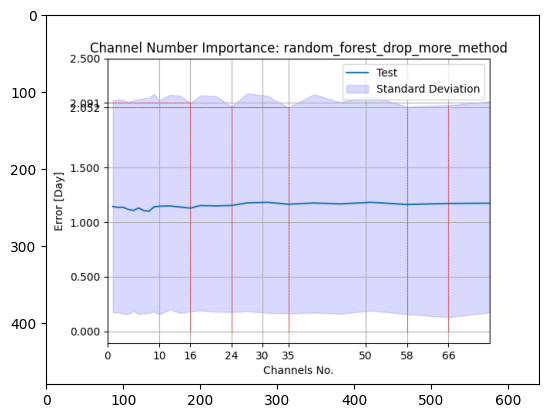

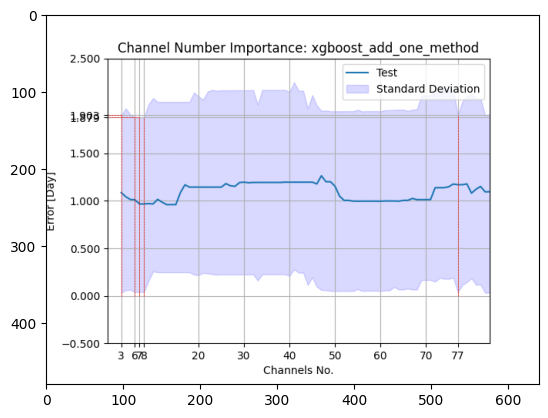

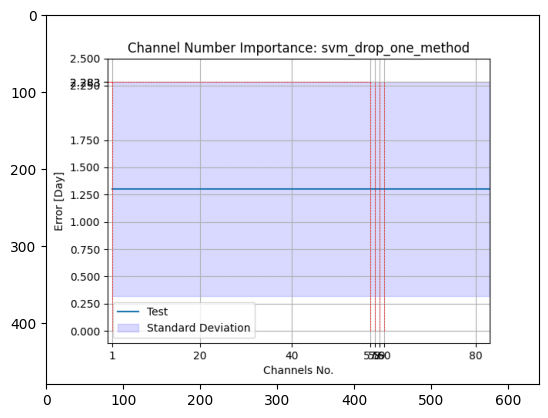

In [10]:
plot_best(type='test')

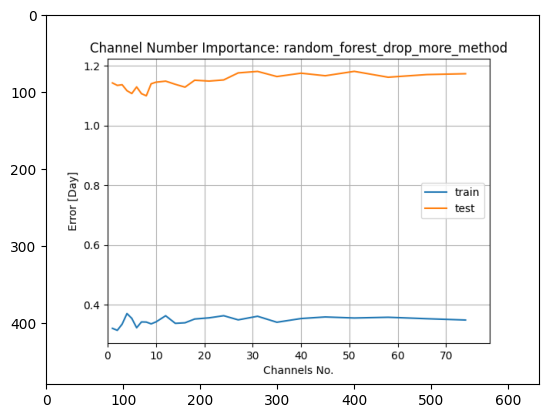

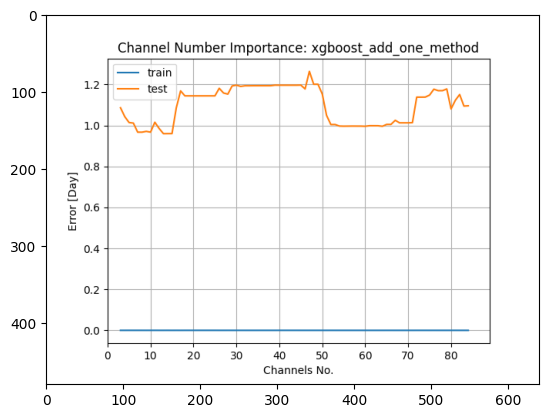

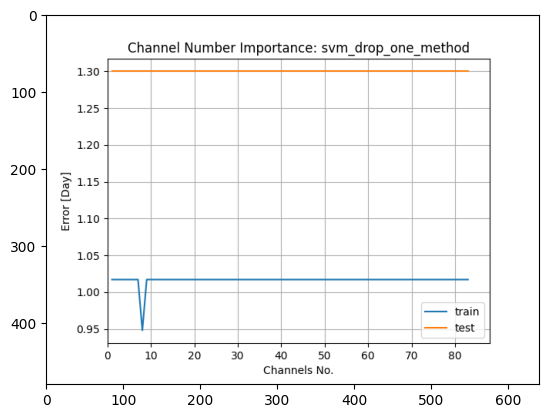

In [11]:
plot_best(type='train_test')